1. Evaluar juicios de hipótesis (2 puntos): para evaluar la pertinencia de diversas
hipótesis, se te solicita discernir si es posible rechazar la hipótesis nula.
- 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se
identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se
identificaron como heterosexuales. El objetivo era medir actitudes frente a la
adopción homoparental. La organización encargada de procesar los datos obtuvo
los siguientes resultados:

  - El 67% de los encuestados por heterosexuales se mostró a favor de la
  adopción homoparental, mientras que un 72% de los encuestados por
  activistas que se identificaron como homosexuales se mostraron a favor
  de la adopción homoparental.
  - Asumiendo que la hipótesis nula es que ambos porcentajes no son
  diferentes, y la hipótesis alternativa es que existe una diferencia
  substancial entre ambos.
  - Con p-valor de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la
  alternativa con una confianza de 95%?, ¿Cuanta es la confianza máxima
  con la que sería posible rechazar la hipótesis nula en favor de la alternativa
  con estos resultados?

- Hipotesis Nula: Las medias de ambos encuestados son iguales **Hhet = Hhom**
- Hipotesis Alternativa: Las medias de ambos encuestados no son iguales **Hhet != Hhom**

Teniendo un valor p = 0.1183 es imposible rechazar la hipotesis nula con un valor de confianza
del 95%. Esto indica que ambos grupos encuestados tienen un porcentaje de encuestados a favor
de la adopcion homoparental igual.

Para rechazar la hipotesis nula se necesitaria un valor p de por lo menos 0.1184. Por lo tanto, 
con un grado de confianza del 11.84% se podria decir que ambos grupos son distintos entre si.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('nations.csv', encoding='iso-8859-1', index_col=0)

In [3]:
df['is_Africa'] = np.where(df['region'] == 'Africa', 1, 0)
df['is_Americas'] = np.where(df['region'] == 'Americas', 1, 0)
df['is_Asia'] = np.where(df['region'] == 'Asia', 1, 0)
df['is_Europe'] = np.where(df['region'] == 'Europe', 1, 0)
df['is_Oceania'] = np.where(df['region'] == 'Oceania', 1, 0)

variables = ['femlab', 'literacy', 'school']

In [31]:
def prueba_hipotesis(df, variable, binarize):
    tmp = df.copy()

    grupo_0 = df[df[binarize] == 0][variable].dropna()
    grupo_1 = df[df[binarize] == 1][variable].dropna()

    media_grupo_0 = np.mean(grupo_0)
    media_grupo_1 = np.mean(grupo_1)

    diferencias_media = media_grupo_0 - media_grupo_1

    statistic, pvalue = ttest_ind(grupo_0, grupo_1)

    if pvalue < 0.05:
        hay_diferencia_estadistica = True
    
    else:
        hay_diferencia_estadistica = False

    print(f'> Media Grupo 0 {binarize} - {variable}: {media_grupo_0} \n'
          f'> Media Grupo 1 {binarize} - {variable}: {media_grupo_1} \n'
          f'> La diferencia entre medias fue de: {diferencias_media} \n\n'
          f'> Valor t: {statistic} \n'
          f'> Valor p: {pvalue} \n\n'
          f'> Hay diferencia estadistica: {hay_diferencia_estadistica}')

In [32]:
prueba_hipotesis(df, 'gdp', 'is_Americas')

> Media Grupo 0 is_Americas - gdp: 12454.322363866519 
> Media Grupo 1 is_Americas - gdp: 10634.03789358428 
> La diferencia entre medias fue de: 1820.2844702822385 

> Valor t: 0.6763126232164977 
> Valor p: 0.49972496437556313 

> Hay diferencia estadistica: False


TypeError: cannot unpack non-iterable NoneType object

In [21]:
np.mean(df.query('is_Americas == 0')['gdp'])

12454.322363866519

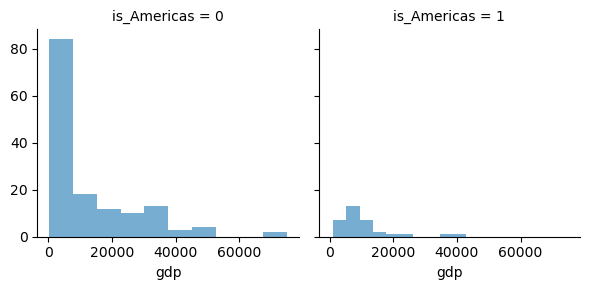

In [6]:
def graficar_histogramas_dos_poblaciones(df, variable, binarize):
    grid = sns.FacetGrid(df, col=binarize)
    grid.map(plt.hist, variable, alpha=0.6)
    plt.show()

graficar_histogramas_dos_poblaciones(df, 'gdp', 'is_Americas')

> Media Grupo 0 is_Africa - femlab: 0.6673058826549381 
> Media Grupo 1 is_Africa - femlab: 0.7726099938154218 
> La diferencia entre medias fue de: -0.10530411116048377 

> Valor t: -2.1240601426214893 
> Valor p: 0.037251490066351214 

> Hay diferencia estadistica: True


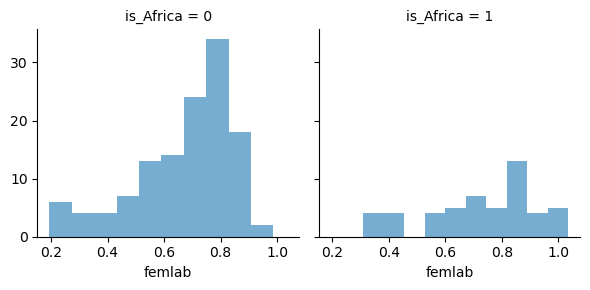

> Media Grupo 0 is_Africa - literacy: 90.7635617723652 
> Media Grupo 1 is_Africa - literacy: 58.75499992370605 
> La diferencia entre medias fue de: 32.00856184865914 

> Valor t: 8.930424901851616 
> Valor p: 3.994247363088655e-13 

> Hay diferencia estadistica: True


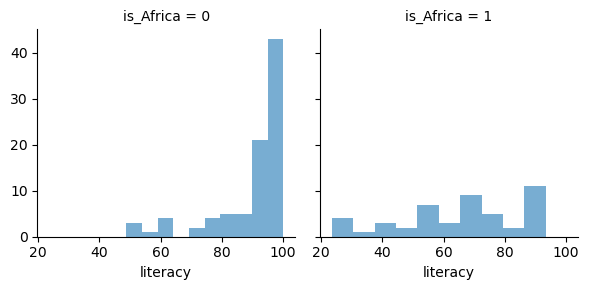

> Media Grupo 0 is_Africa - school: 8.075816958558326 
> Media Grupo 1 is_Africa - school: 3.8991666793823243 
> La diferencia entre medias fue de: 4.176650279176002 

> Valor t: 7.398789634848081 
> Valor p: 2.506562147117656e-10 

> Hay diferencia estadistica: True


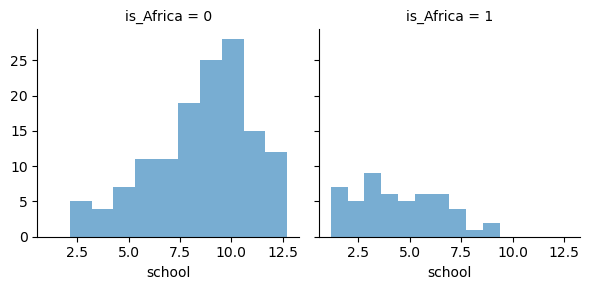

> Media Grupo 0 is_Americas - femlab: 0.717171926770294 
> Media Grupo 1 is_Americas - femlab: 0.6147142904145376 
> La diferencia entre medias fue de: 0.10245763635575633 

> Valor t: 1.8126560553345914 
> Valor p: 0.07423504235944225 

> Hay diferencia estadistica: False


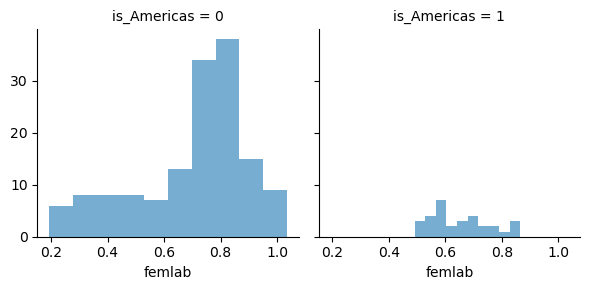

> Media Grupo 0 is_Americas - literacy: 79.74064301607902 
> Media Grupo 1 is_Americas - literacy: 89.91607121058873 
> La diferencia entre medias fue de: -10.175428194509706 

> Valor t: -1.7476639765674338 
> Valor p: 0.08497092390203104 

> Hay diferencia estadistica: False


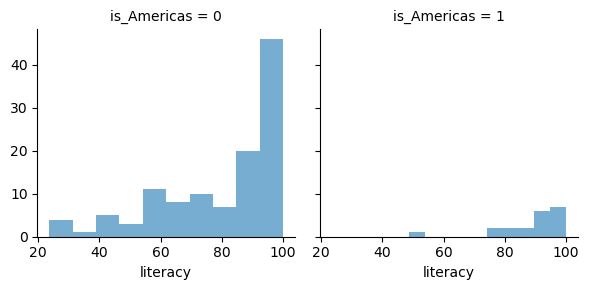

> Media Grupo 0 is_Americas - school: 6.713450281243575 
> Media Grupo 1 is_Americas - school: 7.655952317374093 
> La diferencia entre medias fue de: -0.9425020361305183 

> Valor t: -1.1126108014626708 
> Valor p: 0.2697369370759409 

> Hay diferencia estadistica: False


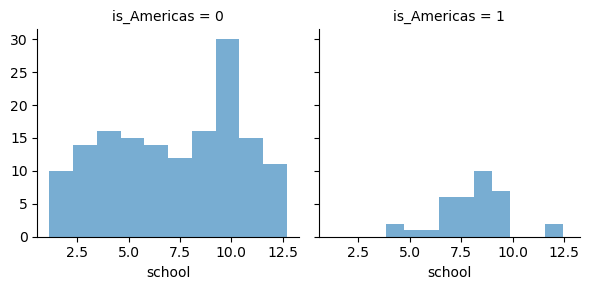

> Media Grupo 0 is_Asia - femlab: 0.7277374975383281 
> Media Grupo 1 is_Asia - femlab: 0.6327565221682839 
> La diferencia entre medias fue de: 0.09498097537004413 

> Valor t: 1.9854231383818297 
> Valor p: 0.05107321717323076 

> Hay diferencia estadistica: False


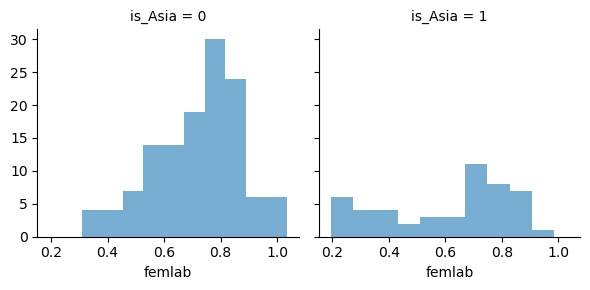

> Media Grupo 0 is_Asia - literacy: 79.4880207379659 
> Media Grupo 1 is_Asia - literacy: 86.46159362792969 
> La diferencia entre medias fue de: -6.9735728899637905 

> Valor t: -1.3979872320553766 
> Valor p: 0.16659489233492986 

> Hay diferencia estadistica: False


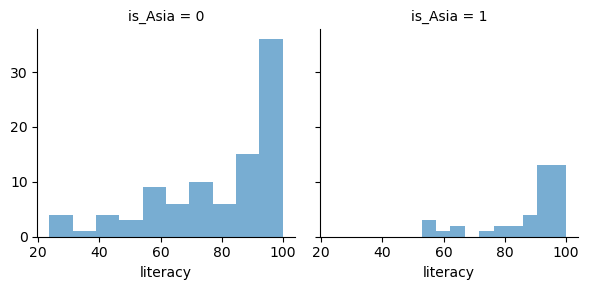

> Media Grupo 0 is_Asia - school: 6.7670138478279105 
> Media Grupo 1 is_Asia - school: 7.175362338190493 
> La diferencia entre medias fue de: -0.4083484903625827 

> Valor t: -0.5632613562010934 
> Valor p: 0.5750828171359073 

> Hay diferencia estadistica: False


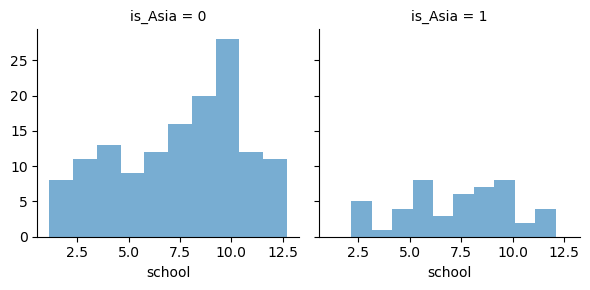

> Media Grupo 0 is_Europe - femlab: 0.6773964903856579 
> Media Grupo 1 is_Europe - femlab: 0.7766571385519844 
> La diferencia entre medias fue de: -0.09926064816632651 

> Valor t: -1.7535327187079588 
> Valor p: 0.08395148108894243 

> Hay diferencia estadistica: False


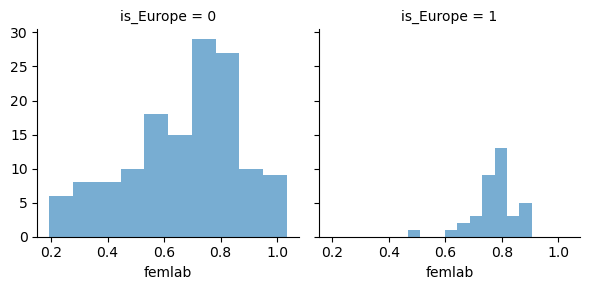

> Media Grupo 0 is_Europe - literacy: 77.58844998008327 
> Media Grupo 1 is_Europe - literacy: 98.67857142857143 
> La diferencia entre medias fue de: -21.090121448488162 

> Valor t: -3.9194810425671585 
> Valor p: 0.00020643980375570616 

> Hay diferencia estadistica: True


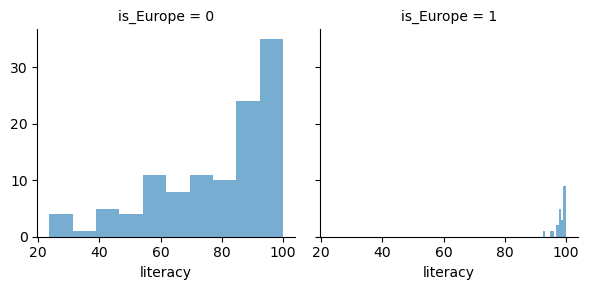

> Media Grupo 0 is_Europe - school: 6.1438596457765815 
> Media Grupo 1 is_Europe - school: 9.97499990463257 
> La diferencia entre medias fue de: -3.8311402588559886 

> Valor t: -5.32438021853567 
> Valor p: 1.1963998353390732e-06 

> Hay diferencia estadistica: True


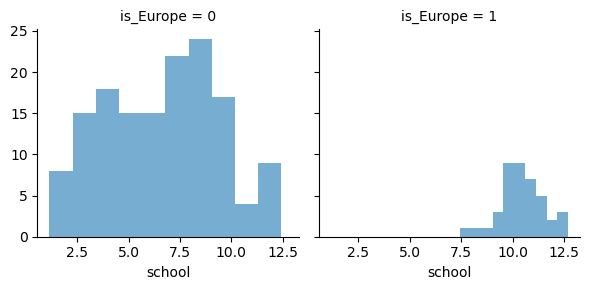

> Media Grupo 0 is_Oceania - femlab: 0.6969690125592998 
> Media Grupo 1 is_Oceania - femlab: nan 
> La diferencia entre medias fue de: nan 

> Valor t: nan 
> Valor p: nan 

> Hay diferencia estadistica: False


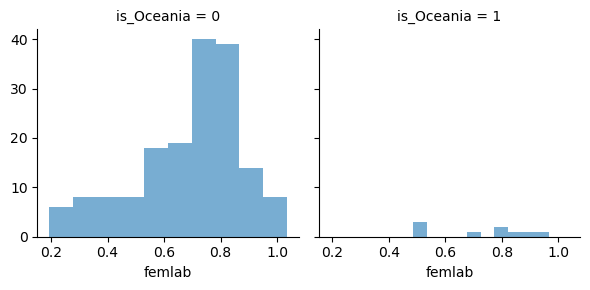

> Media Grupo 0 is_Oceania - literacy: 81.74706547696826 
> Media Grupo 1 is_Oceania - literacy: nan 
> La diferencia entre medias fue de: nan 

> Valor t: nan 
> Valor p: nan 

> Hay diferencia estadistica: False


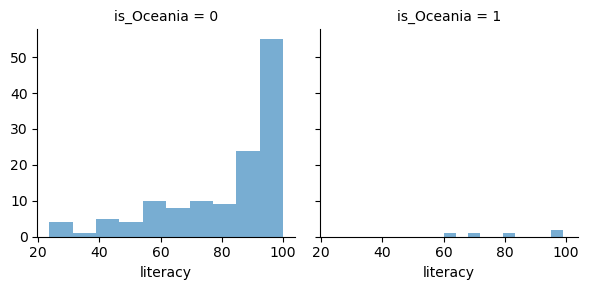

> Media Grupo 0 is_Oceania - school: 6.899295753156635 
> Media Grupo 1 is_Oceania - school: nan 
> La diferencia entre medias fue de: nan 

> Valor t: nan 
> Valor p: nan 

> Hay diferencia estadistica: False


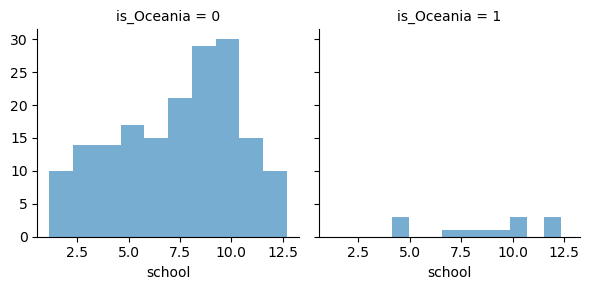

In [14]:
# femlab = Tasa entre hombres y mujeres en el mercado laboral
# literacy = Tasa de alfabetismo
# school = Promedio años de escolaridad

for continente in df.iloc[:, [-5, -4, -3, -2, -1]].columns:
    for variable in variables:
        prueba_hipotesis(df, variable, continente)
        _ = graficar_histogramas_dos_poblaciones(df, variable, continente)

'''
Al analizar Africa, se pudieron observar los siguientes resultados:
    - La tasa de hombres y mujeres en el mercado laboral es estadisticamente mayor en Africa que
    en el resto del mundo
    - La tasa de alfabetismo es estadisticamente menor en Africa que en el resto del mundo
    - El promedio de años de escolaridad es estadisticamente similar entre Africa y el resto del
    mundo

Al analizar America, se pudieron observar los siguientes resultados:
    - La tasa de hombres y mujeres en el mercado laboral es estadisticamente similar entre America
    y todo el mundo
    - La tasa de alfabetismo es estadisticamente similar entre America y el resto del mundo
    - El promedio de años de escolaridad es estadicamente similar entre America y el resto del
    mundo

Al analizar Asia, se pudieron observar los siguientes resultados:
    - La tasa de hombres y mujeres en el mercado laboral es estadisticamente similar entre Asia
    y todo el mundo
    - La tasa de alfabetismo es estadisticamente similar entre Asia y el resto del mundo
    - El promedio de años de escolaridad es estadicamente similar entre Asia y el resto del
    mundo

Al analizar Europe, se pudieron observar los siguientes resultados:
    - La tasa de hombres y mujeres en el mercado laboral es estadisticamente mayor en Europa
    que en el resto del mundo (hay mas hombres trabajando en Europa que en todo el mundo)
    - La tasa de alfabetismo es estadisticamente mayor en Europa que en el resto del mundo
    - El promedio de años de escolaridad es estadisticamente mayor en Europa que en el 
    resto del mundo
'''